In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [38]:
!pip3 install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 3.1 MB/s eta 0:00:00a 0:00:01


In [4]:
## smote to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [5]:
X_test, y_test = sm.fit_resample(X_test, y_test)

In [7]:
model = Sequential()

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [8]:
history = model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/200


2022-11-29 03:36:19.525274: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11339/11339 [==============================] - 15s 1ms/step - loss: 0.8452 - accuracy: 0.6704 - val_loss: 0.7180 - val_accuracy: 0.7255
Epoch 2/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7397 - accuracy: 0.7169 - val_loss: 0.7045 - val_accuracy: 0.7329
Epoch 3/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7234 - accuracy: 0.7226 - val_loss: 0.6869 - val_accuracy: 0.7395
Epoch 4/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7158 - accuracy: 0.7261 - val_loss: 0.6923 - val_accuracy: 0.7356
Epoch 5/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7106 - accuracy: 0.7279 - val_loss: 0.6863 - val_accuracy: 0.7350
Epoch 6/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7048 - accuracy: 0.7296 - val_loss: 0.6885 - val_accuracy: 0.7354
Epoch 7/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7019 - accuracy: 0.7305 - val_loss: 0.6918

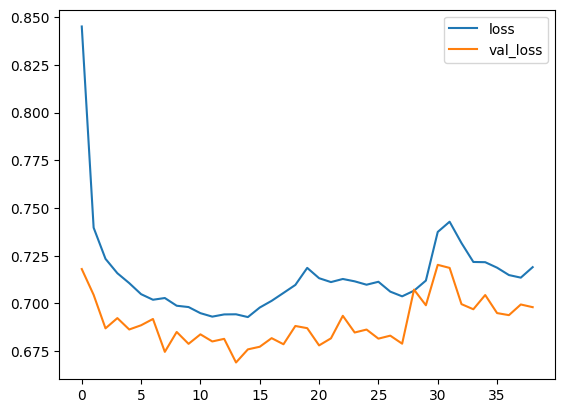

In [9]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
plt.show()

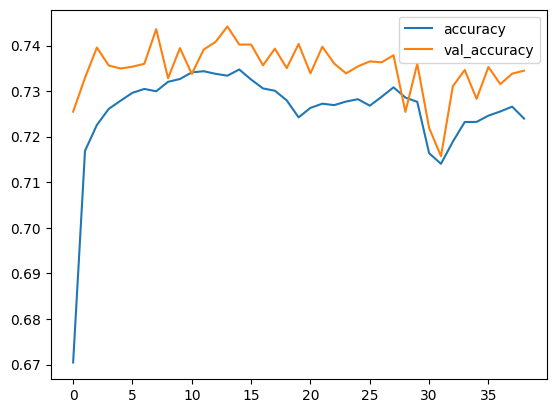

In [10]:
losses[['accuracy', 'val_accuracy']].plot()
plt.show()

In [11]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [12]:
preds = model.predict(X_train)

11339/11339 [==============================] - 5s 400us/step


In [13]:
print(preds[0])

[4.8755325e-02 2.8684017e-08 9.3302244e-01 1.8721988e-06 1.8220289e-02]


In [14]:
print(np.sum(preds[0]))

0.99999994


In [15]:
matrix = confusion_matrix(y_train.argmax(axis=1), preds.argmax(axis=1))

In [16]:
matrix

array([[39826, 11457,  4176,  6183, 10924],
       [ 1471, 70369,    65,   101,   560],
       [  815,   879, 67043,  3529,   300],
       [ 2611,  4998,    60, 60115,  4782],
       [13469,  9600,  2450, 16417, 30630]])

In [17]:
print(classification_report(y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61     72566
           1       0.72      0.97      0.83     72566
           2       0.91      0.92      0.92     72566
           3       0.70      0.83      0.76     72566
           4       0.65      0.42      0.51     72566

    accuracy                           0.74    362830
   macro avg       0.73      0.74      0.72    362830
weighted avg       0.73      0.74      0.72    362830



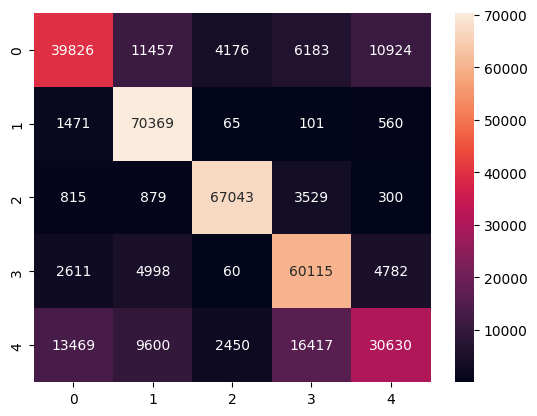

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

## For the testing dataset

In [19]:
preds = model.predict(X_test)

5561/5561 [==============================] - 2s 412us/step


In [20]:
print(preds[0])

[0.39101806 0.0274272  0.3430394  0.02595267 0.21256265]


In [21]:
print(np.sum(preds[0]))

1.0


In [22]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [23]:
matrix

array([[19117,  6059,  2032,  3438,  4940],
       [  631, 34400,   163,   148,   244],
       [  516,   476, 32597,  1798,   199],
       [ 1122,  2861,    23, 29596,  1984],
       [ 6690,  4775,  1286,  7859, 14976]])

In [24]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60     35586
           1       0.71      0.97      0.82     35586
           2       0.90      0.92      0.91     35586
           3       0.69      0.83      0.75     35586
           4       0.67      0.42      0.52     35586

    accuracy                           0.73    177930
   macro avg       0.73      0.73      0.72    177930
weighted avg       0.73      0.73      0.72    177930



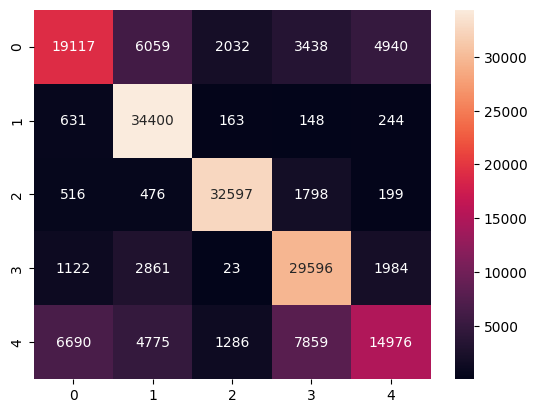

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()